In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
!pip install imblearn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../input/chess/games.csv")
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [7]:
# Checking for missing values
missing_values = df.isnull().sum()

# Descriptive statistics for numerical columns
descriptive_stats = df.describe()

missing_values


id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

We see that our dataset has no misisng values. 
Just from the descriptive stats summary, we see that: 
1. The mean rating for white players is approximately 1597, and for black players, it is 1589. If we look at the min-max range, we see white having (784, 2700) and black having (291, 2723). 
2. In terms of duration of the games, we have an avearge of 60 moves, and the fastest win is 1 move. We can assume that this is due to a player aborting the game. We have a maximum of 349 moves, and a guess for this (which may or may not be investigated later) is that we had a competitive endgame with lot of pawn and king movements. Note that these are just hypothesis for now. 
3. The average number of half-moves (ply) before the opening ends is about 5, with a range from 1 to 28 moves.

In [8]:
descriptive_stats

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Instead of caring about the openings and variations, let's focus on just openings alone. 

In [9]:
import re

def clean_opening_name(opening):
    # Step 1: Remove anything after # (indicates variation)
    opening = opening.split('#')[0]
    # Remove other symbols (| and :) 
    opening = opening.split('|')[0].strip()  
    opening = opening.split(':')[0].strip() 
    # Remove keywords like 'Accepted', 'Declined', and numbers (variations)
    opening = re.sub(r'Accepted|Declined|\d+', '', opening)
    # Remove any extra whitespace
    return opening.strip()

# Apply this function to the column
df['opening_name'] = df['opening_name'].apply(clean_opening_name)


In [10]:
df['opening_name'].unique()

array(['Slav Defense', 'Nimzowitsch Defense', "King's Pawn Game",
       "Queen's Pawn Game", 'Philidor Defense', 'Sicilian Defense',
       'Blackmar-Diemer Gambit', 'Italian Game', 'Scandinavian Defense',
       "Van't Kruijs Opening", 'French Defense', 'Four Knights Game',
       'Horwitz Defense', 'English Opening', 'Scotch Game',
       "Queen's Gambit Refused", "Queen's Gambit",
       'Robatsch (Modern) Defense', 'Indian Game', 'Dutch Defense',
       'Zukertort Opening', 'Vienna Game', 'Modern Defense',
       'Blumenfeld Countergambit', "Queen's Pawn", 'Crab Opening',
       "Queen's Indian Defense", 'Gruenfeld Defense',
       'Yusupov-Rubinstein System', 'Ruy Lopez', "Bishop's Opening",
       'Benoni Defense', "King's Indian Attack", 'Alekhine Defense',
       'Caro-Kann Defense', 'Goldsmith Defense', 'Nimzo-Indian Defense',
       'Bogo-Indian Defense', "King's Knight Opening", 'Amar Opening',
       'Paleface Attack', 'Hungarian Opening', 'Center Game',
       'Englund Ga

In [11]:
df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [12]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

We have some columns not necessary for our current analysis. So we focus on: 
- white_rating
- black_rating
- opening_ame
- rated
- winner

We'll ignore the others for now, but of course, we need an id to keep track. 

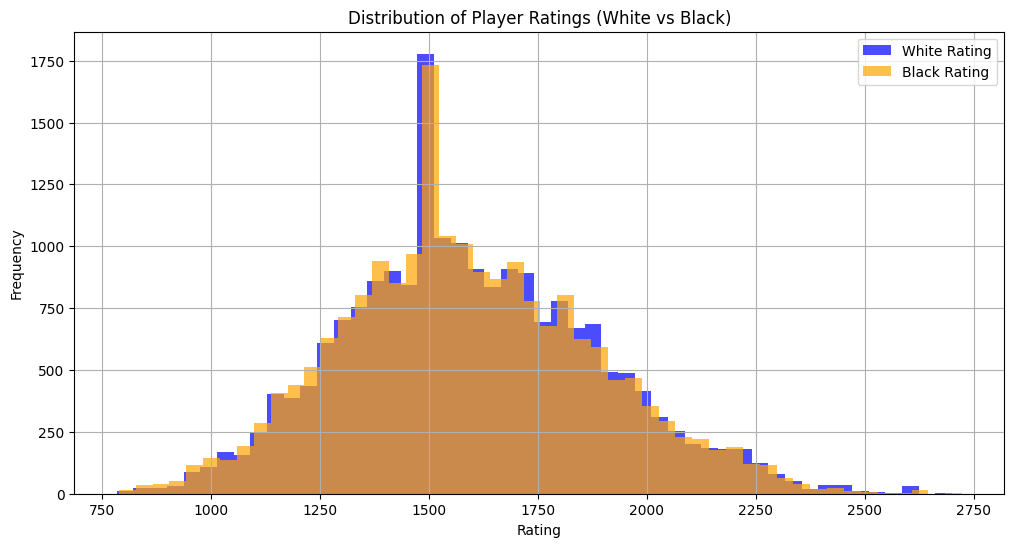

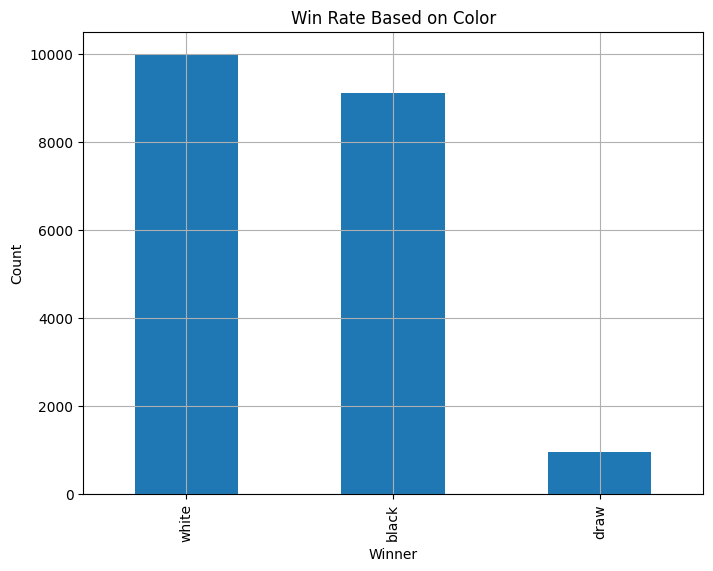

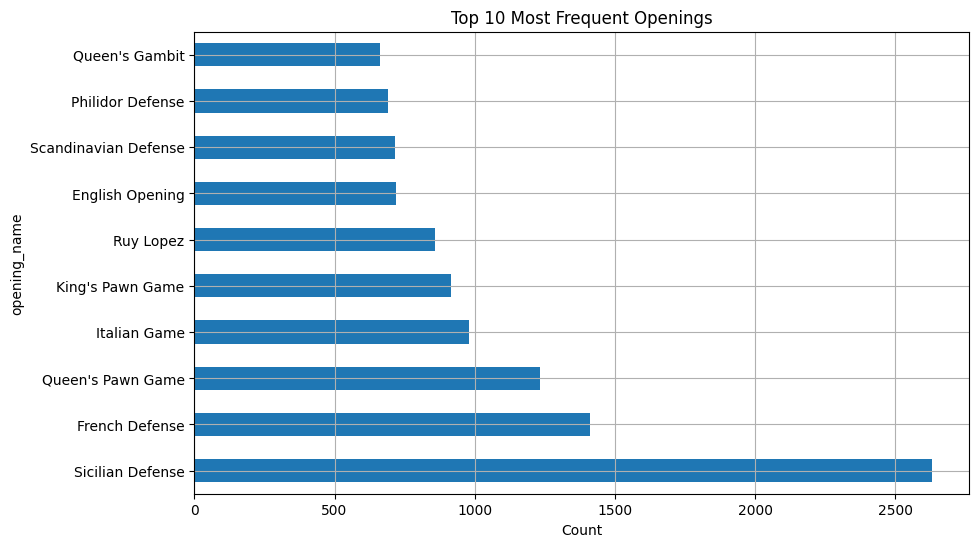

In [13]:
import matplotlib.pyplot as plt

# Plotting distribution of player ratings
plt.figure(figsize=(12, 6))
plt.hist(df['white_rating'], bins=50, alpha=0.7, label='White Rating', color='blue')
plt.hist(df['black_rating'], bins=50, alpha=0.7, label='Black Rating', color='orange')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings (White vs Black)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Analyzing win rate based on color
color_outcomes = df['winner'].value_counts()
color_outcomes.plot(kind='bar', figsize=(8, 6))
plt.title('Win Rate Based on Color')
plt.ylabel('Count')
plt.xlabel('Winner')
plt.grid(True)
plt.show()

# Analyzing the impact of openings on outcomes
top_openings = df['opening_name'].value_counts().nlargest(10)
top_openings.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Most Frequent Openings')
plt.xlabel('Count')
plt.grid(True)
plt.show()


We have an almost normal distribution for the players' ratings distribution. 
Also we see white having more wins than black and lower cases of drawish games. 
Another observation is the openings frequency. 
We see Sicilian and French defense mostly used. 
But let's take a look at how the opening decides the winners

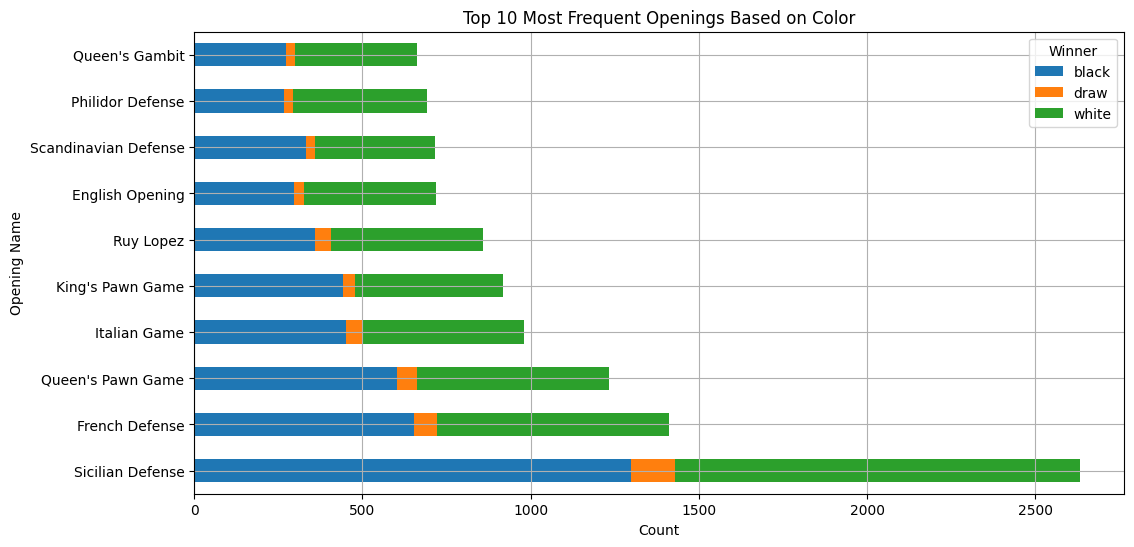

In [14]:
# Group by opening and winner color
openings_by_color = df.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)

# Select top 10 most frequent openings
top_openings_by_color = openings_by_color.loc[openings_by_color.sum(axis=1).nlargest(10).index]

top_openings_by_color.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title('Top 10 Most Frequent Openings Based on Color')
plt.xlabel('Count')
plt.ylabel('Opening Name')
plt.grid(True)
plt.legend(title='Winner')
plt.show()


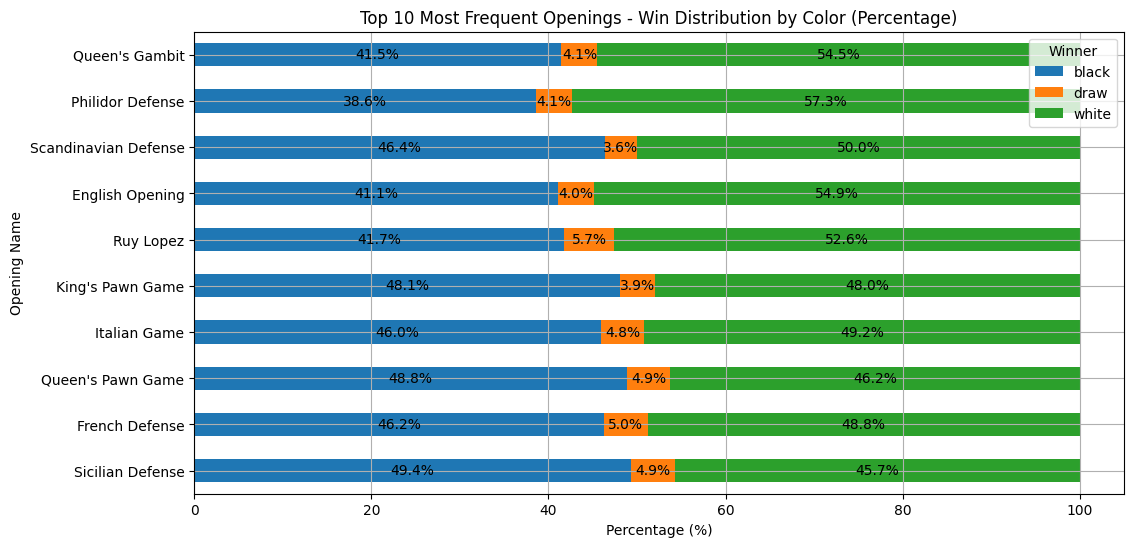

In [19]:
import matplotlib.pyplot as plt


openings_by_color = df.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)


top_openings_by_color = openings_by_color.loc[openings_by_color.sum(axis=1).nlargest(10).index]

# Calculate percentage for each winner category within each opening
top_openings_by_color_percentage = top_openings_by_color.div(top_openings_by_color.sum(axis=1), axis=0) * 100


ax = top_openings_by_color_percentage.plot(kind='barh', stacked=True, figsize=(12, 6))


for i in range(len(top_openings_by_color_percentage)):
    cumulative_sum = 0  # This will keep track of the cumulative sum for each bar
    for j, winner in enumerate(top_openings_by_color_percentage.columns):
        width = top_openings_by_color_percentage.iloc[i, j]  # The percentage value for this segment
        if width > 0:  # Only annotate non-zero values
            ax.annotate(f'{width:.1f}%', 
                        xy=(cumulative_sum + width / 2, i),  # Position at the middle of the segment
                        ha='center', va='center')
            cumulative_sum += width  

plt.title('Top 10 Most Frequent Openings - Win Distribution by Color (Percentage)')
plt.xlabel('Percentage (%)')
plt.ylabel('Opening Name')
plt.grid(True)
plt.legend(title='Winner')
plt.show()


White Wins More: In most of the openings, white wins more frequently than black. This is consistent with the general advantage of playing as white, as white moves first and can dictate the pace of the game.


Black Wins Prominent in Certain Openings: Black has an advantage in openings like the Sicilian Defense, Queen's pawn game (which is kind of surprising), and Philidor Defense, which are designed to neutralize white's first-move advantage.


Draws: Draws appear relatively less frequent across all openings, with slightly more draws in the Queen's Pawn Game, Sicilian defense, French defense, Italian game, and Ruy Lopez. 

In [ ]:

# # Analyzing the impact of openings and color on outcomes
# top_openings = df['opening_name'].value_counts().nlargest(10)
# top_openings.plot(kind='barh', figsize=(10, 6))
# plt.title('Top 10 Most Frequent Openings')
# plt.xlabel('Count')
# plt.grid(True)
# plt.show()


- Distribution of Player Ratings: Both white and black player ratings follow a similar distribution, with a peak around 1500–1600. This suggests that most players are in this rating range, but there are players on both lower and higher ends.

- Win Rate Based on Color: White wins more frequently than black, followed by draws. This is a common pattern in chess, where white, having the first move, tends to have a slight advantage.

- Top 10 Most Frequent Openings: The most frequently played openings include popular ones like "Sicilian Defense," "French Defense," and "Scandinavian Defense." These openings are common choices in chess and could influence the outcome.

In [ ]:
# Creating a new feature for rating difference (white - black)
df['rating_diff'] = df['white_rating'] - df['black_rating']

# Analyzing the impact of rating difference on outcomes
# Grouping by rating difference and calculating the win rate for each outcome
bins = pd.cut(df['rating_diff'], bins=20)  # Bin the rating differences into intervals
rating_diff_outcome = df.groupby(bins)['winner'].value_counts(normalize=True).unstack()

# Visualizing the effect of rating difference on outcomes
rating_diff_outcome.plot(kind='line', figsize=(10, 6))
plt.title('Effect of Rating Difference on Game Outcomes')
plt.ylabel('Proportion of Outcome')
plt.xlabel('Rating Difference (White - Black)')
plt.grid(True)
plt.show()


- Positive rating differences (white stronger): As the rating difference increases in favor of white, white wins more frequently. This confirms that higher-rated players tend to win more often.
- Negative rating differences (black stronger): Similarly, as black's rating advantage increases (negative rating difference), black's win rate increases.
- Draws: Draws are more common when the rating difference is small, meaning when both players have similar skill levels.

## Openings and Colors

In [ ]:
# Grouping data by opening and color to analyze win rates based on color and openings
# Creating a column that captures if the player was white or black
df['player_color'] = df['winner'].apply(lambda x: 'white' if x == 'white' else 'black')

# Grouping by opening and player color to analyze the outcome distribution
openings_colors = df.groupby(['opening_name', 'player_color'], observed = True)['winner'].value_counts(normalize=True).unstack()

# Visualizing the outcomes for the most frequent openings and color combinations
top_openings_colors = openings_colors.loc[df['opening_name'].value_counts().nlargest(10).index]
top_openings_colors.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Outcome Distribution by Opening and Color')
plt.xlabel('Proportion of Outcome')
plt.ylabel('Opening and Color')
plt.legend(loc='best')
plt.grid(True)
plt.show()


The bar chart shows the outcome distribution based on the most frequent openings combined with the player's color (white or black). Here are some key takeaways:

- In many openings, white wins more frequently than black, which aligns with the overall trend where white tends to win more often.
- Some openings, such as the "Sicilian Defense," seem to show a more balanced distribution between white and black wins.
- Draws are relatively less common across all openings, though they appear slightly more in certain openings like the "French defense"

## Colors, Ratings, and Outcomes

In [ ]:
import seaborn as sns

# Creating a combined color and outcome feature for easier analysis
df['color_outcome'] = df['winner'] + '_' + df['player_color']

# Visualizing the relationship between color, ratings, and outcomes
plt.figure(figsize=(12, 6))
sns.boxplot(x='color_outcome', y='white_rating', data=df)
plt.title('White Rating Distribution by Color and Outcome')
plt.ylabel('White Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='color_outcome', y='black_rating', data=df)
plt.title('Black Rating Distribution by Color and Outcome')
plt.ylabel('Black Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Here are the observations from the boxplots that show the distribution of white and black ratings based on the outcome and color combination:

- White Rating:
    - When white wins, the white player's rating tends to be higher compared to when the game is drawn or when black wins.
    - Draws and losses for white show a more evenly distributed rating range, but white wins usually correlate with a higher rating.
- Black Rating:
    - A similar pattern exists for black ratings: when black wins, black players tend to have a higher rating compared to games where white wins or the game is drawn.
    - Draws occur more frequently when both players have similar ratings.
This analysis confirms that rating advantages influence the game outcome, regardless of whether the player is white or black.

## Openings, Colors, Ratings and Outcomes

In [ ]:
# Creating a new feature that indicates if the rating difference favors white, black, or is balanced
df['rating_advantage'] = pd.cut(df['rating_diff'], bins=[-float('inf'), -100, 100, float('inf')], labels=['black_advantage', 'balanced', 'white_advantage'])

# Grouping by opening, rating advantage, and color to analyze outcomes
openings_ratings_colors = df.groupby(['opening_name', 'rating_advantage', 'player_color'], observed=True)['winner'].value_counts(normalize=True).unstack()

# Focusing on the top 5 openings for clarity
top_openings_ratings_colors = openings_ratings_colors.loc[df['opening_name'].value_counts().nlargest(5).index]

# Visualizing the outcomes for the top 5 openings, rating advantages, and color combinations
top_openings_ratings_colors.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Outcome Distribution by Opening, Rating Advantage, and Color')
plt.xlabel('Proportion of Outcome')
plt.ylabel('Opening, Rating Advantage, and Color')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
# Creating a new column to directly capture the three outcomes: white win, black win, and draw
df['outcome'] = df['winner'].apply(lambda x: 'white_win' if x == 'white' else ('black_win' if x == 'black' else 'draw'))

# Grouping by opening and color to analyze the outcome distribution, now including draws
openings_colors_outcome = df.groupby(['opening_name', 'player_color', 'outcome'], observed=True).size().unstack(fill_value=0)

# Normalizing the data to get proportions
openings_colors_outcome = openings_colors_outcome.div(openings_colors_outcome.sum(axis=1), axis=0)

# Selecting the top 10 most frequent openings
top_openings = df['opening_name'].value_counts().nlargest(10).index
top_openings_colors_outcome = openings_colors_outcome.loc[top_openings]

# Visualizing the corrected outcomes for the most frequent openings and color combinations
top_openings_colors_outcome.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Corrected Outcome Distribution by Opening and Color (Including Draws)')
plt.xlabel('Proportion of Outcome')
plt.ylabel('Opening and Color')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Re-encoding the 'opening_eco' column as 'opening_eco_encoded'
df['opening_eco_encoded'] = LabelEncoder().fit_transform(df['opening_eco'])

# Re-selecting relevant features for the model
features = ['white_rating', 'black_rating', 'rating_diff', 'opening_eco_encoded']
X = df[features]
y = df['outcome_encoded']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rebuilding the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model again
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['black_win', 'draw', 'white_win'])

accuracy, report


In [ ]:
accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Dictionary to store model performances
model_performances = {}

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
model_performances['Naive Bayes'] = (accuracy_score(y_test, y_pred_nb), classification_report(y_test, y_pred_nb, target_names=['black_win', 'draw', 'white_win']))

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
model_performances['SVM'] = (accuracy_score(y_test, y_pred_svm), classification_report(y_test, y_pred_svm, target_names=['black_win', 'draw', 'white_win']))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
model_performances['KNN'] = (accuracy_score(y_test, y_pred_knn), classification_report(y_test, y_pred_knn, target_names=['black_win', 'draw', 'white_win']))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
model_performances['Gradient Boosting'] = (accuracy_score(y_test, y_pred_gb), classification_report(y_test, y_pred_gb, target_names=['black_win', 'draw', 'white_win']))

# Displaying results
model_performances


In [ ]:
model_performances['Naive Bayes']

In [ ]:
# Using class weights to address class imbalance in Random Forest and Gradient Boosting

# Updating the Random Forest model with class weights
rf_model_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_weighted.fit(X_train, y_train)
y_pred_rf_weighted = rf_model_weighted.predict(X_test)

# Updating the Gradient Boosting model with class weights
gb_model_weighted = GradientBoostingClassifier(random_state=42)  # GradientBoostingClassifier doesn't have class_weight directly
gb_model_weighted.fit(X_train, y_train)
y_pred_gb_weighted = gb_model_weighted.predict(X_test)

# Evaluating the weighted Random Forest model
accuracy_rf_weighted = accuracy_score(y_test, y_pred_rf_weighted)
report_rf_weighted = classification_report(y_test, y_pred_rf_weighted, target_names=['black_win', 'draw', 'white_win'])

# Evaluating the weighted Gradient Boosting model
accuracy_gb_weighted = accuracy_score(y_test, y_pred_gb_weighted)
report_gb_weighted = classification_report(y_test, y_pred_gb_weighted, target_names=['black_win', 'draw', 'white_win'])

# Displaying the results
(accuracy_rf_weighted, report_rf_weighted), (accuracy_gb_weighted, report_gb_weighted)


In [ ]:
# Adding a new feature for game duration (number of turns)
df['game_duration'] = df['turns']

# Adding the time control feature from the increment_code (encoding it)
df['increment_code_encoded'] = LabelEncoder().fit_transform(df['increment_code'])

# Updating the features to include game_duration and increment_code_encoded
features = ['white_rating', 'black_rating', 'rating_diff', 'opening_eco_encoded', 'game_duration', 'increment_code_encoded']
X = df[features]
y = df['outcome_encoded']

# Splitting the dataset again into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rebuilding the Gradient Boosting model with class weighting to handle class imbalance
gb_model_weighted = GradientBoostingClassifier(random_state=42)
gb_model_weighted.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gb_weighted = gb_model_weighted.predict(X_test)

# Evaluating the improved model with new features
accuracy_weighted = accuracy_score(y_test, y_pred_gb_weighted)
report_weighted = classification_report(y_test, y_pred_gb_weighted, target_names=['black_win', 'draw', 'white_win'])

accuracy_weighted, report_weighted


In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training set to oversample the 'draw' class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Rebuilding the Gradient Boosting model with the resampled data
gb_model_smote = GradientBoostingClassifier(random_state=42)
gb_model_smote.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_gb_smote = gb_model_smote.predict(X_test)

# Evaluating the model after SMOTE oversampling
accuracy_smote = accuracy_score(y_test, y_pred_gb_smote)
report_smote = classification_report(y_test, y_pred_gb_smote, target_names=['black_win', 'draw', 'white_win'])

accuracy_smote, report_smote


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb_smote)
cm_df = pd.DataFrame(cm, index=['black_win', 'draw', 'white_win'], columns=['black_win', 'draw', 'white_win'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extracting precision, recall, and f1-score from the classification report
report_dict = classification_report(y_test, y_pred_gb_smote, target_names=['black_win', 'draw', 'white_win'], output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose().iloc[:3, :3]  # Select precision, recall, and f1 for the three classes

# Plotting precision, recall, and f1-score as bar charts
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score by Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
